Data Cleaning and Preparation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.core.display import HTML

%matplotlib inline
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (17, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df1 = pd.read_csv('/content/absolute-number-of-deaths-from-ambient-particulate-air-pollution.csv')
df2 = pd.read_csv('/content/death-rate-from-air-pollution-per-100000.csv')
df3 = pd.read_csv('/content/death-rates-from-air-pollution.csv')
df4 = pd.read_csv('/content/share-deaths-indoor-pollution.csv')
df5 = pd.read_csv('/content/outdoor-pollution-death-rate.csv')

In [ ]:
trdf1 = df1.rename(columns = {'Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)':'Total Deaths for Outdoor Air Pollution', 'Deaths - Cause: All causes - Risk: Household air pollution from solid fuels - Sex: Both - Age: All Ages (Number)':'Total Deaths for Household Air Pollution from Solid Fuels', 'Deaths - Cause: All causes - Risk: Air pollution - Sex: Both - Age: All Ages (Number)':'Total Deaths for Air Pollution'})

apoh = trdf1[['Entity','Year','Total Deaths for Air Pollution','Total Deaths for Outdoor Air Pollution','Total Deaths for Household Air Pollution from Solid Fuels']]

drapph = df2.rename(columns = {'Deaths - Cause: All causes - Risk: Air pollution - Sex: Both - Age: Age-standardized (Rate)':'Death Rate from Air Pollution Per 100000'})

drapmp = df3.rename(columns={'Deaths - Cause: All causes - Risk: Ambient particulate matter pollution - Sex: Both - Age: Age-standardized (Rate)':'Deaths Rate for Ambient Particulate Matter Pollution', 'Deaths - Cause: All causes - Risk: Ambient ozone pollution - Sex: Both - Age: Age-standardized (Rate)':'Deaths Rate for Ambient Ozone Pollution'}).drop(['Deaths - Cause: All causes - Risk: Household air pollution from solid fuels - Sex: Both - Age: Age-standardized (Rate)','Deaths - Cause: All causes - Risk: Air pollution - Sex: Both - Age: Age-standardized (Rate)','Code'], axis =1)

dhapsfp = df4.rename(columns={'Deaths - Cause: All causes - Risk: Household air pollution from solid fuels - Sex: Both - Age: Age-standardized (Percent)':'Deaths for Household Air Pollution from Solid Fuels (Percent)'})

dfoapp = df5.rename(columns={'Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: Age-standardized (Rate)':'Death for Outdoor Air Pollution - (Per 100K)'})

In [ ]:
merap = apoh.merge(drapph, on=['Entity','Year'], how='left').drop('Code', axis=1)

merap119_tr = merap[merap.Year == 2019].sort_values('Total Deaths for Air Pollution', ascending=False).drop([6629,2129,6719,1649,6749,5579,5489,6599,5669,59,6689,1679,2009,1979,4409,6659,4829,3719,3149,4229])

merap119hd = merap119_tr[['Entity','Year','Total Deaths for Air Pollution']].reset_index().drop('index', axis=1).head(20)

merap119tl = merap119_tr[['Entity','Year','Total Deaths for Air Pollution']].reset_index().drop('index', axis=1).tail(20).sort_values('Total Deaths for Air Pollution', ascending=True)

merap219_tr = merap[merap.Year == 2019].sort_values('Total Deaths for Outdoor Air Pollution', ascending=False).drop([6629,2129,6719,1649,6749,5579,5489,6599,5669,59,6689,1679,2009,1979,4409,6659,4829,3719,3149,4229])

merap219hd = merap219_tr[['Entity','Year','Total Deaths for Outdoor Air Pollution']].reset_index().drop('index', axis=1).head(20)

merap219tl = merap219_tr[['Entity','Year','Total Deaths for Outdoor Air Pollution']].reset_index().drop('index', axis=1).tail(20).sort_values('Total Deaths for Outdoor Air Pollution', ascending=True)

merap319_tr = merap[merap.Year == 2019].sort_values('Total Deaths for Household Air Pollution from Solid Fuels', ascending=False).drop([6629,2129,6719,1649,6749,5579,5489,6599,5669,59,6689,1679,2009,1979,4409,6659,4829,3719,3149,4229])

merap319hd = merap319_tr[['Entity','Year','Total Deaths for Household Air Pollution from Solid Fuels']].reset_index().drop('index', axis=1).head(20)

merap419_tr = merap[merap.Year == 2019].sort_values('Death Rate from Air Pollution Per 100000', ascending=False).drop([6629,2129,6719,1649,6749,5579,5489,6599,5669,59,6689,1679,2009,1979,4409,6659,4829,3719,3149,4229])

merap419hd = merap419_tr[['Entity','Year','Death Rate from Air Pollution Per 100000']].reset_index().drop('index', axis=1).head(20)

merap419tl = merap419_tr[['Entity','Year','Death Rate from Air Pollution Per 100000']].reset_index().drop('index', axis=1).tail(20).sort_values('Death Rate from Air Pollution Per 100000', ascending=True)

merap19re = merap.loc[[1649,5579,5489,3719,5669,59,2009,3149,4229,2129]].reset_index().drop('index', axis=1)

merapwd = merap[merap.Entity == 'World'].reset_index().drop('index', axis=1)

merapdf1_tr = merap.pivot_table(values = 'Total Deaths for Air Pollution',index = ['Entity'], columns = 'Year')
merapdf1 = merapdf1_tr.drop(['African Region (WHO)','East Asia & Pacific (WB)','Eastern Mediterranean Region (WHO)','Europe & Central Asia (WB)','European Region (WHO)','G20','Latin America & Caribbean (WB)','Middle East & North Africa (WB)','North America (WB)','OECD Countries','Region of the Americas (WHO)','South Asia (WB)','South-East Asia Region (WHO)','Sub-Saharan Africa (WB)','Western Pacific Region (WHO)','World','World Bank High Income','World Bank Lower Middle Income','World Bank Upper Middle Income'])
merapdf1.sort_values(list(merapdf1_tr.columns),inplace=True)
merapdf1 = merapdf1.sort_index()

merapdf2_tr = merap.pivot_table(values = 'Total Deaths for Outdoor Air Pollution',index = ['Entity'], columns = 'Year')
merapdf2 = merapdf2_tr.drop(['African Region (WHO)','East Asia & Pacific (WB)','Eastern Mediterranean Region (WHO)','Europe & Central Asia (WB)','European Region (WHO)','G20','Latin America & Caribbean (WB)','Middle East & North Africa (WB)','North America (WB)','OECD Countries','Region of the Americas (WHO)','South Asia (WB)','South-East Asia Region (WHO)','Sub-Saharan Africa (WB)','Western Pacific Region (WHO)','World','World Bank High Income','World Bank Lower Middle Income','World Bank Upper Middle Income'])
merapdf2.sort_values(list(merapdf2_tr.columns),inplace=True)
merapdf2 = merapdf2.sort_index()

merapdf3_tr = merap.pivot_table(values = 'Total Deaths for Household Air Pollution from Solid Fuels',index = ['Entity'], columns = 'Year')
merapdf3 = merapdf3_tr.drop(['African Region (WHO)','East Asia & Pacific (WB)', 'World Bank Low Income','Eastern Mediterranean Region (WHO)','Europe & Central Asia (WB)','European Region (WHO)','G20','Latin America & Caribbean (WB)','Middle East & North Africa (WB)','North America (WB)','OECD Countries','Region of the Americas (WHO)','South Asia (WB)','South-East Asia Region (WHO)','Sub-Saharan Africa (WB)','Western Pacific Region (WHO)','World','World Bank High Income','World Bank Lower Middle Income','World Bank Upper Middle Income'])
merapdf3.sort_values(list(merapdf3_tr.columns),inplace=True)
merapdf3 = merapdf3.sort_index()

In [ ]:
drapmp1_tr = drapmp[drapmp.Year == 2019].sort_values('Deaths Rate for Ambient Particulate Matter Pollution', ascending=False).drop([6629,2129,6719,1649,6749,5579,5489,6599,5669,59,6689,1679,2009,1979,4409,6659,4829,3719,3149,4229])

drapmp1hd = drapmp1_tr[['Entity','Year','Deaths Rate for Ambient Particulate Matter Pollution']].reset_index().drop('index', axis=1).head(20)

drapmp1tl = drapmp1_tr[['Entity','Year','Deaths Rate for Ambient Particulate Matter Pollution']].reset_index().drop('index', axis=1).tail(20).sort_values('Deaths Rate for Ambient Particulate Matter Pollution', ascending=True)

drapmp2_tr = drapmp[drapmp.Year == 2019].sort_values('Deaths Rate for Ambient Ozone Pollution', ascending=False).drop([6629,2129,6719,1649,6749,5579,5489,6599,5669,59,6689,1679,2009,1979,4409,6659,4829,3719,3149,4229])

drapmp2hd = drapmp2_tr[['Entity','Year','Deaths Rate for Ambient Ozone Pollution']].reset_index().drop('index', axis=1).head(20)

drapmp2tl = drapmp2_tr[['Entity','Year','Deaths Rate for Ambient Ozone Pollution']].reset_index().drop('index', axis=1).tail(20).sort_values('Deaths Rate for Ambient Ozone Pollution', ascending=True)

drapmpre = drapmp.loc[[1649,5579,5489,3719,5669,59,2009,3149,4229,2129]].reset_index().drop('index', axis=1)

drapmpwd = drapmp[drapmp.Entity == 'World'].reset_index().drop('index', axis=1)

drapmp1_tr = drapmp.pivot_table(values = 'Deaths Rate for Ambient Particulate Matter Pollution',index = ['Entity'], columns = 'Year')
drapmp1 = drapmp1_tr.drop(['African Region (WHO)','East Asia & Pacific (WB)', 'World Bank Low Income','Eastern Mediterranean Region (WHO)','Europe & Central Asia (WB)','European Region (WHO)','G20','Latin America & Caribbean (WB)','Middle East & North Africa (WB)','North America (WB)','OECD Countries','Region of the Americas (WHO)','South Asia (WB)','South-East Asia Region (WHO)','Sub-Saharan Africa (WB)','Western Pacific Region (WHO)','World','World Bank High Income','World Bank Lower Middle Income','World Bank Upper Middle Income'])
drapmp1.sort_values(list(drapmp1_tr.columns),inplace=True)
drapmp1 = drapmp1.sort_index()

drapmp2_tr = drapmp.pivot_table(values = 'Deaths Rate for Ambient Ozone Pollution',index = ['Entity'], columns = 'Year')
drapmp2 = drapmp2_tr.drop(['African Region (WHO)','East Asia & Pacific (WB)', 'World Bank Low Income','Eastern Mediterranean Region (WHO)','Europe & Central Asia (WB)','European Region (WHO)','G20','Latin America & Caribbean (WB)','Middle East & North Africa (WB)','North America (WB)','OECD Countries','Region of the Americas (WHO)','South Asia (WB)','South-East Asia Region (WHO)','Sub-Saharan Africa (WB)','Western Pacific Region (WHO)','World','World Bank High Income','World Bank Lower Middle Income','World Bank Upper Middle Income'])
drapmp2.sort_values(list(drapmp2_tr.columns),inplace=True)
drapmp2 = drapmp2.sort_index()

In [ ]:
dhapsfp19 = dhapsfp[dhapsfp.Year == 2019].sort_values('Deaths for Household Air Pollution from Solid Fuels (Percent)', ascending=False).drop([6629,2129,6719,1649,6749,5579,5489,6599,5669,59,6689,1679,2009,1979,4409,6659,4829,3719,3149,4229]).reset_index().drop(['index','Code'], axis=1).head(20)

dhapsfpre = dhapsfp.loc[[1649,5579,5489,3719,5669,59,2009,3149,4229,2129]].reset_index().drop(['index','Code'], axis=1)

dhapsfpwd = dhapsfp[dhapsfp.Entity == 'World'].reset_index().drop(['index','Code'], axis=1)

In [ ]:
dfoapphd = dfoapp[dfoapp.Year == 2019].sort_values('Death for Outdoor Air Pollution - (Per 100K)', ascending=False).drop([6629,2129,6719,1649,6749,5579,5489,6599,5669,59,6689,1679,2009,1979,4409,6659,4829,3719,3149,4229]).reset_index().drop(['index','Code'], axis=1).head(20)

dfoapptl = dfoapp[dfoapp.Year == 2019].sort_values('Death for Outdoor Air Pollution - (Per 100K)', ascending=False).drop([6629,2129,6719,1649,6749,5579,5489,6599,5669,59,6689,1679,2009,1979,4409,6659,4829,3719,3149,4229]).reset_index().drop(['index','Code'], axis=1).tail(20).sort_values('Death for Outdoor Air Pollution - (Per 100K)', ascending=True)

dfoappre = dfoapp.loc[[1649,5579,5489,3719,5669,59,2009,3149,4229,2129]].reset_index().drop(['index','Code'], axis=1)

dfoappwd = dfoapp[dfoapp.Entity == 'World'].reset_index().drop(['index','Code'], axis=1)

Data Visualizations

In [ ]:
HTML('''<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/13185255"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

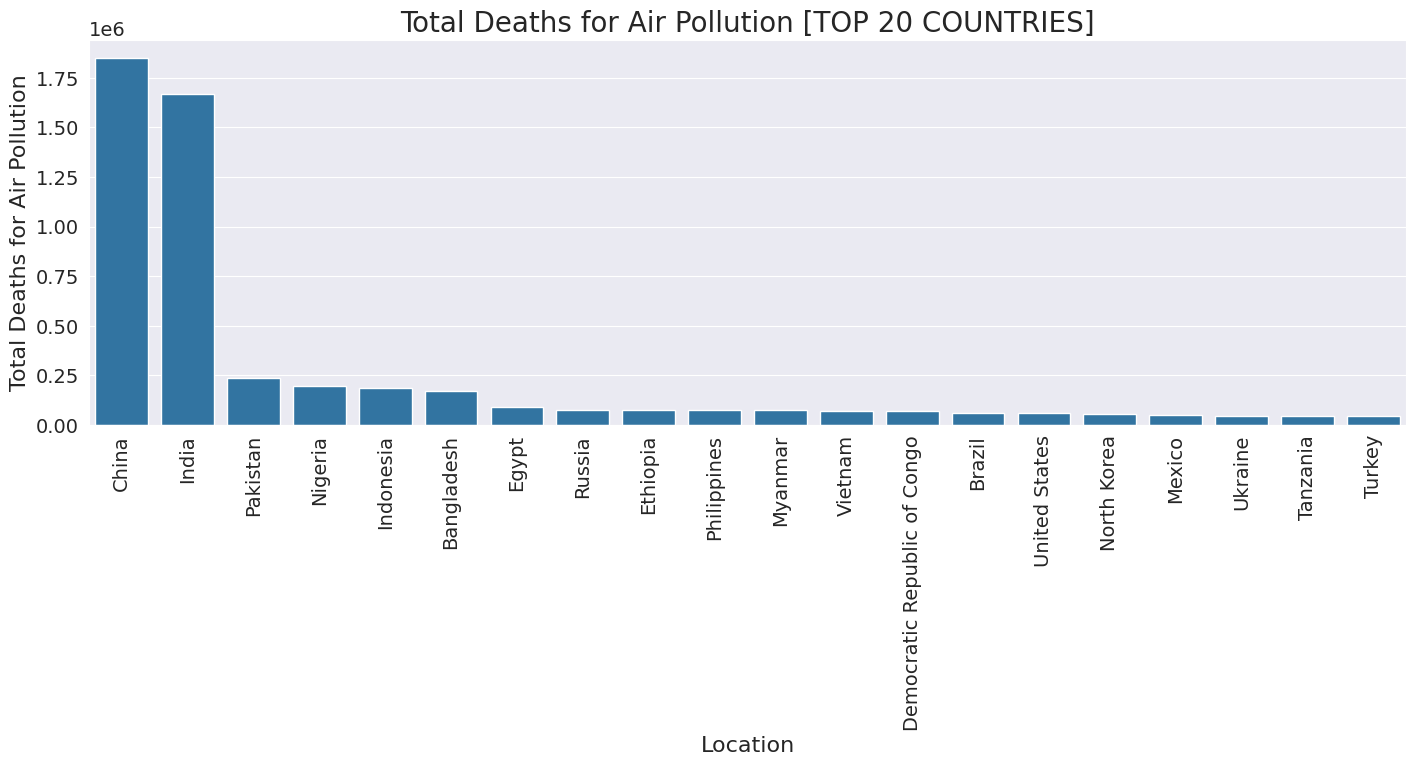

In [ ]:
sns.barplot(x='Entity', y='Total Deaths for Air Pollution', data=merap119hd)

plt.xlabel('Location', fontsize=16)
plt.ylabel('Total Deaths for Air Pollution', fontsize=16)
plt.xticks(rotation=90)
plt.title('Total Deaths for Air Pollution [TOP 20 COUNTRIES]', fontsize=20)

plt.show();

In [ ]:
merap119hd

,Entity,Year,Total Deaths for Air Pollution
0,China,2019,1848274
1,India,2019,1667331
2,Pakistan,2019,235657
3,Nigeria,2019,197567
4,Indonesia,2019,186267
5,Bangladesh,2019,173515
6,Egypt,2019,91663
7,Russia,2019,77516
8,Ethiopia,2019,77020
9,Philippines,2019,74783


<ipython-input-12-76e0a3e72490>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Entity', y='Total Deaths for Air Pollution', data=merap119tl, palette='deep')


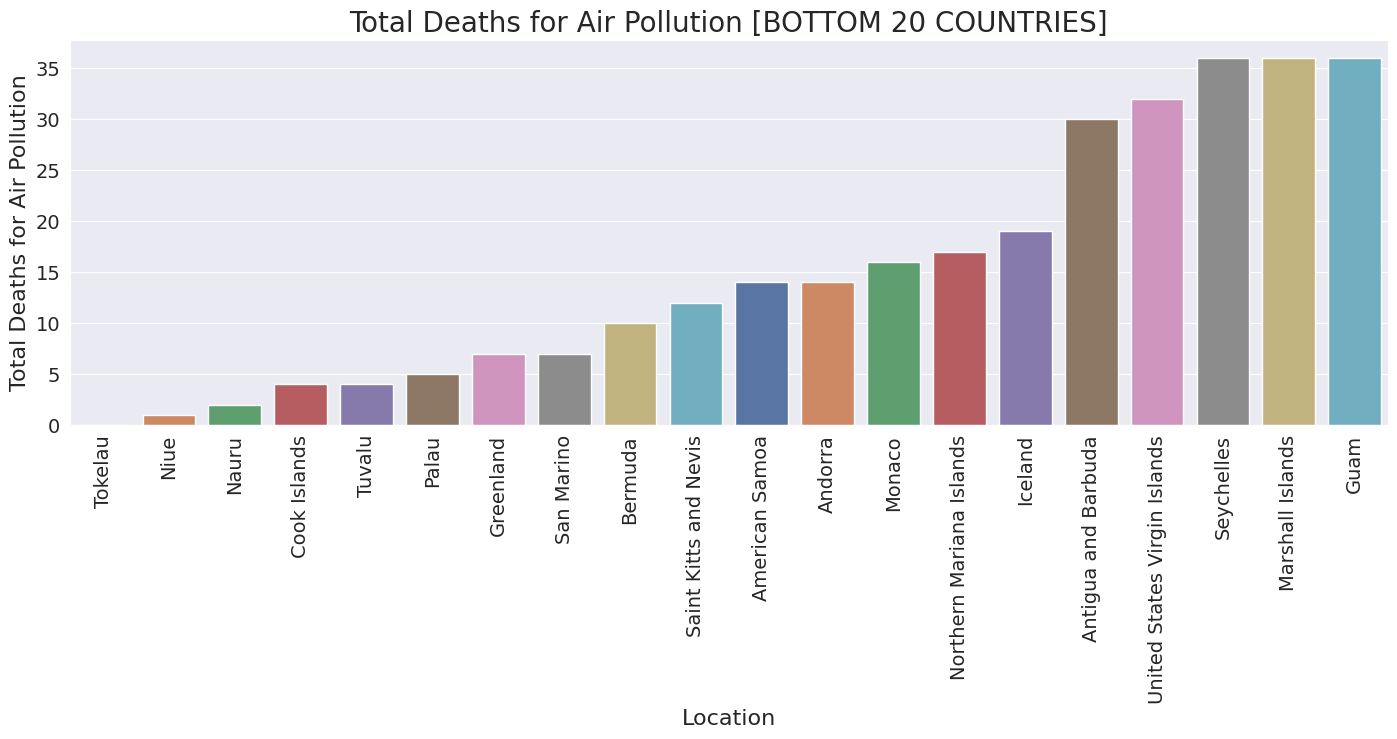

In [ ]:
sns.barplot(x='Entity', y='Total Deaths for Air Pollution', data=merap119tl, palette='deep')

plt.xlabel('Location', fontsize=16)
plt.ylabel('Total Deaths for Air Pollution', fontsize=16)
plt.xticks(rotation=90)
plt.title('Total Deaths for Air Pollution [BOTTOM 20 COUNTRIES]', fontsize=20)

plt.show();

In [ ]:
merap119tl

,Entity,Year,Total Deaths for Air Pollution
207,Tokelau,2019,0
206,Niue,2019,1
205,Nauru,2019,2
203,Cook Islands,2019,4
204,Tuvalu,2019,4
202,Palau,2019,5
201,Greenland,2019,7
200,San Marino,2019,7
199,Bermuda,2019,10
198,Saint Kitts and Nevis,2019,12


In [ ]:
HTML('''<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/13185444"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

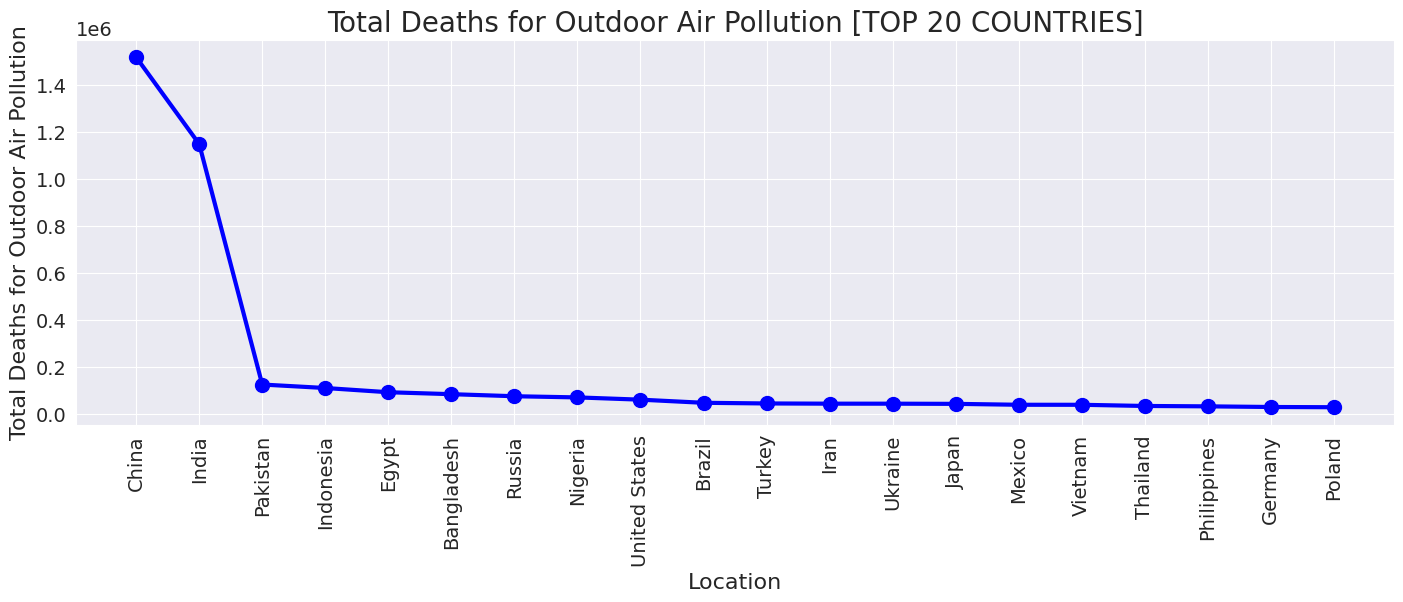

In [ ]:
plt.plot(merap219hd['Entity'], merap219hd['Total Deaths for Outdoor Air Pollution'], 'o-b', lw=3, ms=10)

plt.xlabel('Location', fontsize=16)
plt.ylabel('Total Deaths for Outdoor Air Pollution', fontsize=16)
plt.xticks(rotation=90)
plt.title('Total Deaths for Outdoor Air Pollution [TOP 20 COUNTRIES]', fontsize=20)

plt.show();

In [ ]:
merap219hd

,Entity,Year,Total Deaths for Outdoor Air Pollution
0,China,2019,1516904
1,India,2019,1147669
2,Pakistan,2019,124913
3,Indonesia,2019,110127
4,Egypt,2019,92169
5,Bangladesh,2019,83912
6,Russia,2019,75166
7,Nigeria,2019,70181
8,United States,2019,60572
9,Brazil,2019,47257


<ipython-input-17-98fb721ae7c6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Entity', y='Total Deaths for Outdoor Air Pollution', data=merap219tl, palette='bright')


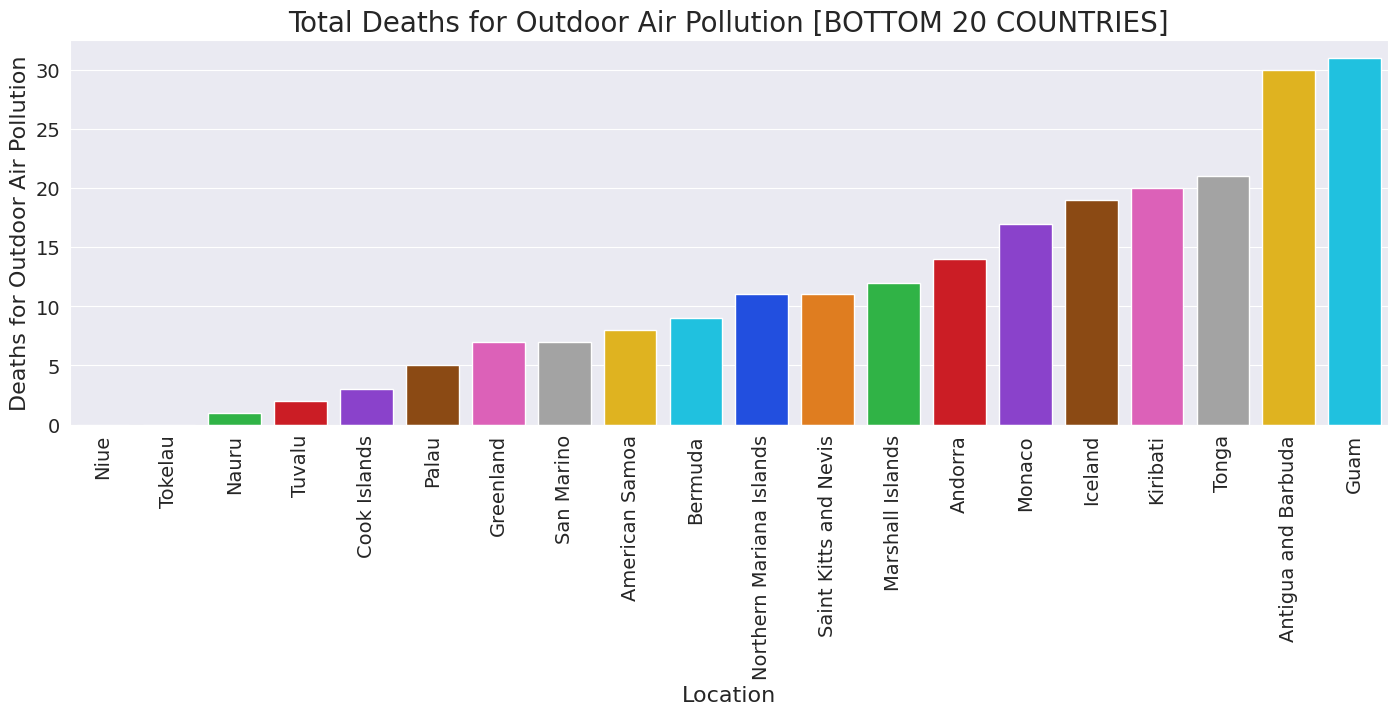

In [ ]:
sns.barplot(x='Entity', y='Total Deaths for Outdoor Air Pollution', data=merap219tl, palette='bright')

plt.xlabel('Location', fontsize=16)
plt.ylabel('Deaths for Outdoor Air Pollution', fontsize=16)
plt.xticks(rotation=90)
plt.title('Total Deaths for Outdoor Air Pollution [BOTTOM 20 COUNTRIES]', fontsize=20)

plt.show();

In [ ]:
merap219tl

,Entity,Year,Total Deaths for Outdoor Air Pollution
206,Niue,2019,0
207,Tokelau,2019,0
205,Nauru,2019,1
204,Tuvalu,2019,2
203,Cook Islands,2019,3
202,Palau,2019,5
201,Greenland,2019,7
200,San Marino,2019,7
199,American Samoa,2019,8
198,Bermuda,2019,9


In [ ]:
HTML('''<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/13185561"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

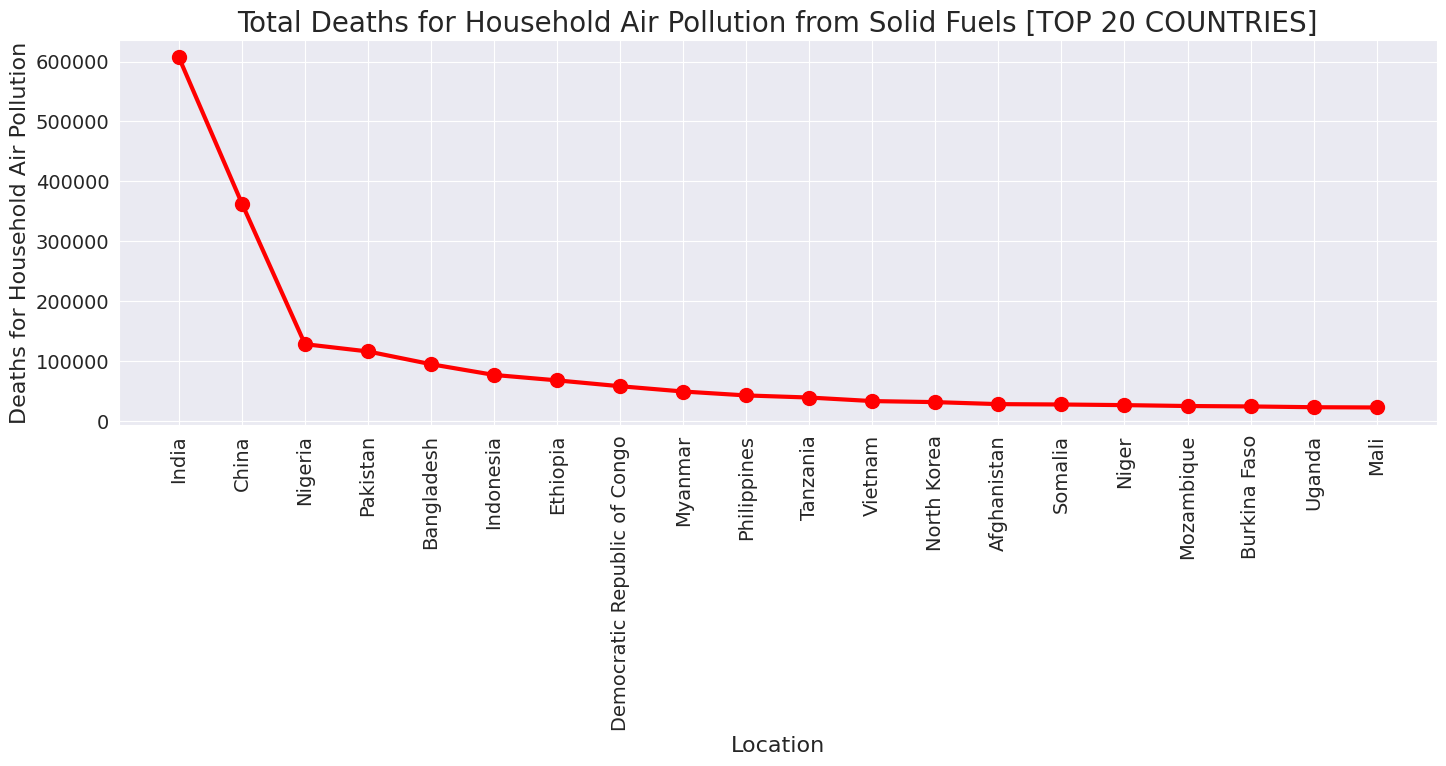

In [ ]:
plt.plot(merap319hd['Entity'], merap319hd['Total Deaths for Household Air Pollution from Solid Fuels'], 'o-r', lw=3, ms=10)

plt.xlabel('Location', fontsize=16)
plt.ylabel('Deaths for Household Air Pollution', fontsize=16)
plt.xticks(rotation=90)
plt.title('Total Deaths for Household Air Pollution from Solid Fuels [TOP 20 COUNTRIES]', fontsize=20)

plt.show();

In [ ]:
merap319hd

,Entity,Year,Total Deaths for Household Air Pollution from Solid Fuels
0,India,2019,606890
1,China,2019,363029
2,Nigeria,2019,128259
3,Pakistan,2019,116090
4,Bangladesh,2019,94789
5,Indonesia,2019,76867
6,Ethiopia,2019,67827
7,Democratic Republic of Congo,2019,58038
8,Myanmar,2019,49223
9,Philippines,2019,42675


<ipython-input-22-4388bce0f2e7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Entity', y='Death Rate from Air Pollution Per 100000', data=merap419hd, palette='dark')


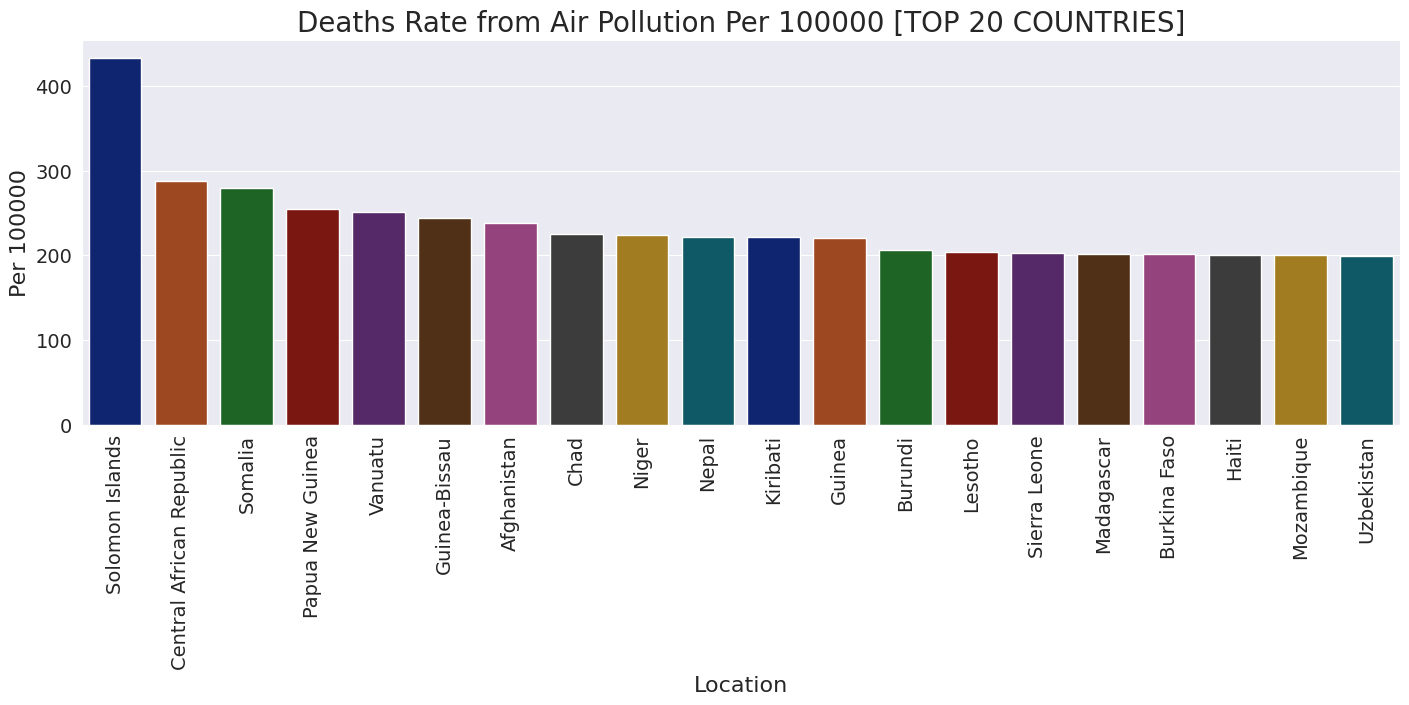

In [ ]:
sns.barplot(x='Entity', y='Death Rate from Air Pollution Per 100000', data=merap419hd, palette='dark')

plt.xlabel('Location', fontsize=16)
plt.ylabel('Per 100000', fontsize=16)
plt.xticks(rotation=90)

plt.title('Deaths Rate from Air Pollution Per 100000 [TOP 20 COUNTRIES]', fontsize=20)

plt.show();

In [ ]:
merap419hd

,Entity,Year,Death Rate from Air Pollution Per 100000
0,Solomon Islands,2019,432.93
1,Central African Republic,2019,287.26
2,Somalia,2019,280.00
3,Papua New Guinea,2019,254.16
4,Vanuatu,2019,250.75
5,Guinea-Bissau,2019,243.93
6,Afghanistan,2019,238.33
7,Chad,2019,224.69
8,Niger,2019,223.49
9,Nepal,2019,222.00


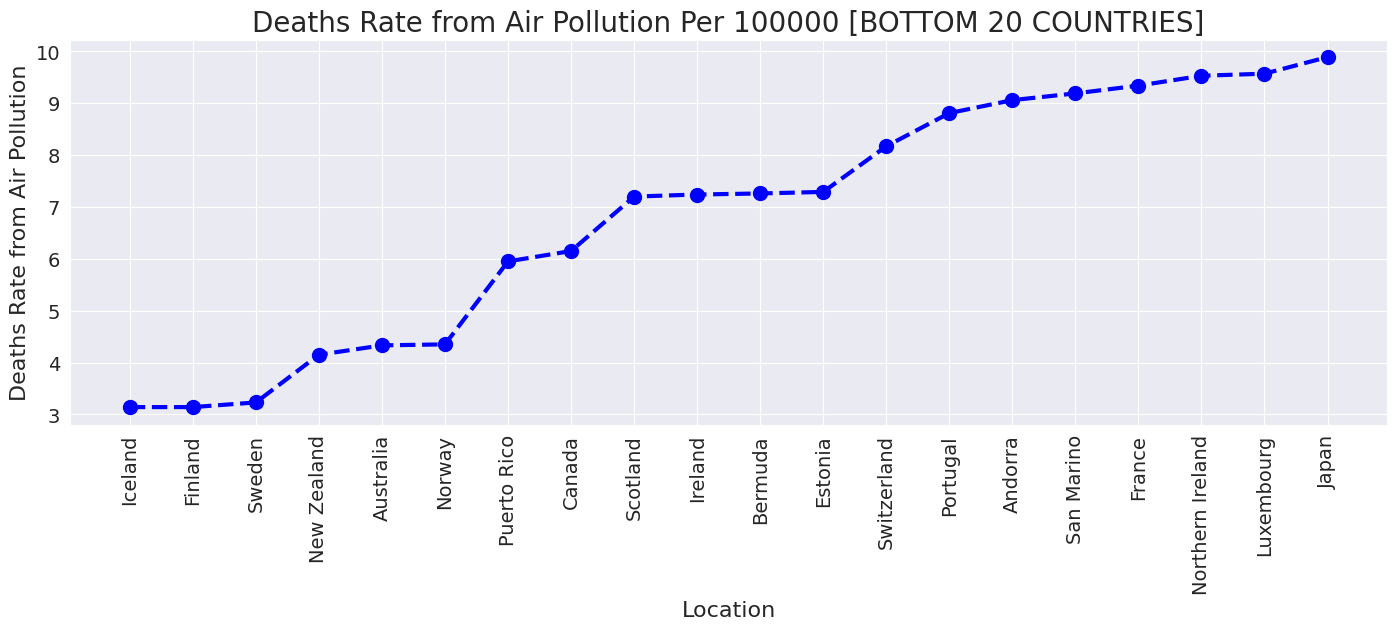

In [ ]:
plt.plot(merap419tl['Entity'], merap419tl['Death Rate from Air Pollution Per 100000'], 'o--b', lw=3, ms=10)

plt.xlabel('Location', fontsize=16)
plt.ylabel('Deaths Rate from Air Pollution', fontsize=16)
plt.xticks(rotation=90)

plt.title('Deaths Rate from Air Pollution Per 100000 [BOTTOM 20 COUNTRIES]', fontsize=20)

plt.show();

In [ ]:
merap419tl

,Entity,Year,Death Rate from Air Pollution Per 100000
206,Iceland,2019,3.14
207,Finland,2019,3.14
205,Sweden,2019,3.23
204,New Zealand,2019,4.15
203,Australia,2019,4.33
202,Norway,2019,4.35
201,Puerto Rico,2019,5.95
200,Canada,2019,6.15
199,Scotland,2019,7.20
198,Ireland,2019,7.24


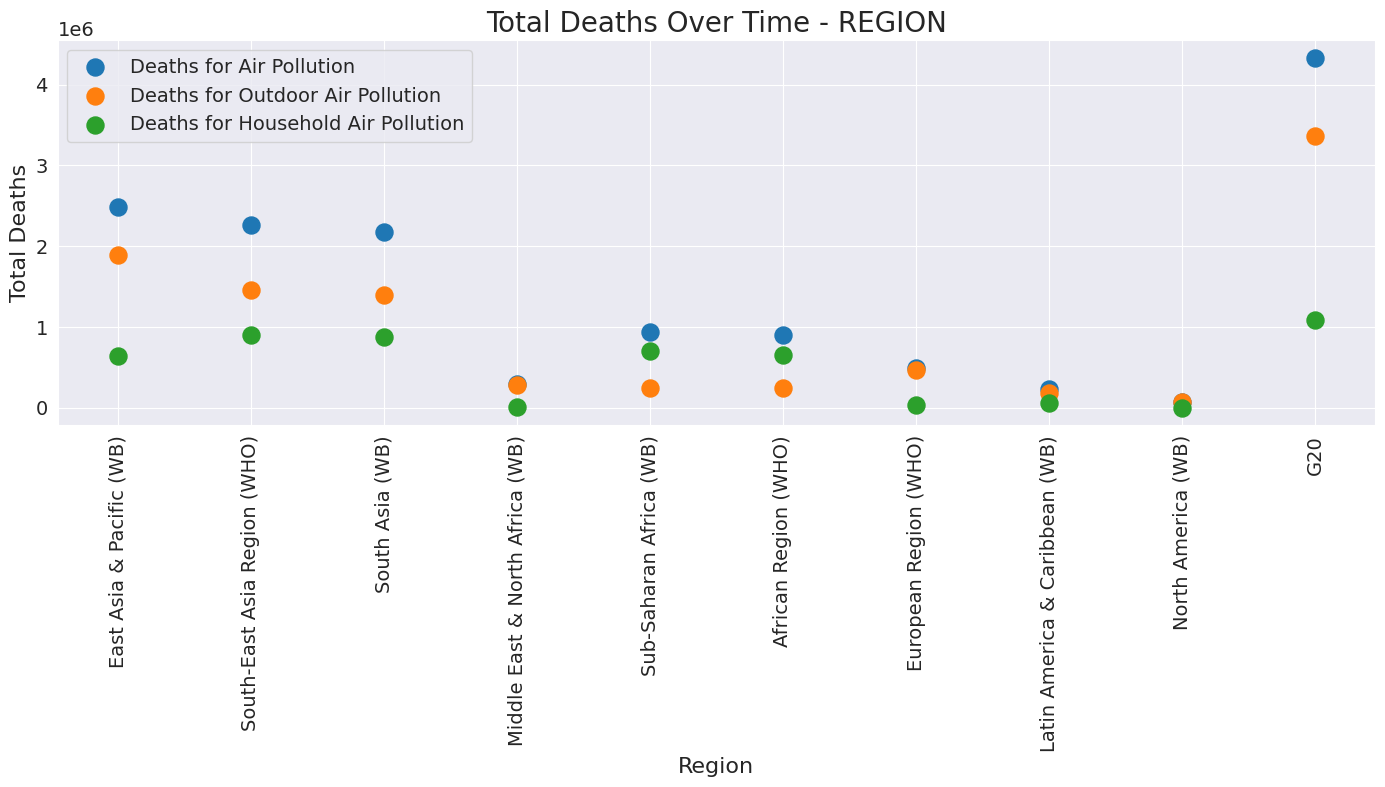

In [ ]:
plt.scatter(merap19re['Entity'], merap19re['Total Deaths for Air Pollution'], s=150)
plt.scatter(merap19re['Entity'], merap19re['Total Deaths for Outdoor Air Pollution'], s=150)
plt.scatter(merap19re['Entity'], merap19re['Total Deaths for Household Air Pollution from Solid Fuels'], s=150)

plt.xlabel('Region', fontsize=16)
plt.ylabel('Total Deaths', fontsize=16)
plt.xticks(rotation=90)
plt.title('Total Deaths Over Time - REGION', fontsize=20)

plt.legend(['Deaths for Air Pollution', 'Deaths for Outdoor Air Pollution', 'Deaths for Household Air Pollution'])

plt.show();

In [ ]:
merap19re

,Entity,Year,Total Deaths for Air Pollution,Total Deaths for Outdoor Air Pollution,Total Deaths for Household Air Pollution from Solid Fuels,Death Rate from Air Pollution Per 100000
0,East Asia & Pacific (WB),2019,2489619,1885595,640576,85.34
1,South-East Asia Region (WHO),2019,2255901,1459196,896382,147.18
2,South Asia (WB),2019,2170505,1397555,874558,165.50
3,Middle East & North Africa (WB),2019,292068,281898,12025,98.58
4,Sub-Saharan Africa (WB),2019,931577,241120,694882,154.40
5,African Region (WHO),2019,897242,245491,656085,148.28
6,European Region (WHO),2019,488702,460353,30746,30.25
7,Latin America & Caribbean (WB),2019,234047,175846,59313,36.35
8,North America (WB),2019,64620,64974,159,10.07
9,G20,2019,4334077,3369322,1088390,73.53


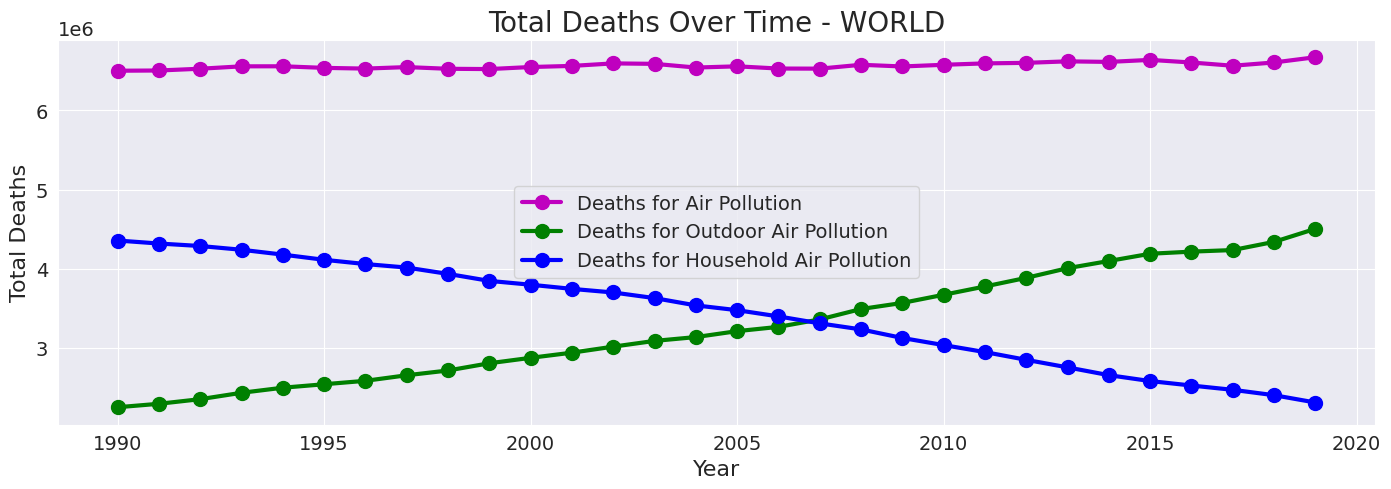

In [ ]:
plt.plot(merapwd['Year'], merapwd['Total Deaths for Air Pollution'], 'o-m', lw=3, ms=10)
plt.plot(merapwd['Year'], merapwd['Total Deaths for Outdoor Air Pollution'], 'o-g', lw=3, ms=10)
plt.plot(merapwd['Year'], merapwd['Total Deaths for Household Air Pollution from Solid Fuels'], 'o-b', lw=3, ms=10)

plt.xlabel('Year', fontsize=16)
plt.ylabel('Total Deaths', fontsize=16)
plt.title('Total Deaths Over Time - WORLD', fontsize=20)

plt.legend(['Deaths for Air Pollution', 'Deaths for Outdoor Air Pollution', 'Deaths for Household Air Pollution'])

plt.show();

In [ ]:
merapwd

,Entity,Year,Total Deaths for Air Pollution,Total Deaths for Outdoor Air Pollution,Total Deaths for Household Air Pollution from Solid Fuels,Death Rate from Air Pollution Per 100000
0,World,1990,6501226,2254550,4358214,156.05
1,World,1991,6504209,2297976,4320449,153.46
2,World,1992,6526572,2356222,4289112,151.49
3,World,1993,6556725,2436824,4241702,149.93
4,World,1994,6557387,2500765,4180438,147.52
5,World,1995,6537356,2544508,4115012,144.52
6,World,1996,6528219,2587941,4061430,141.83
7,World,1997,6547192,2657868,4017097,139.79
8,World,1998,6525727,2718227,3937041,136.88
9,World,1999,6522139,2809566,3848916,134.38


In [ ]:
HTML('''<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/13185785"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

<ipython-input-31-551017e9146e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Entity', y='Deaths Rate for Ambient Particulate Matter Pollution', data=drapmp1hd, palette='deep')


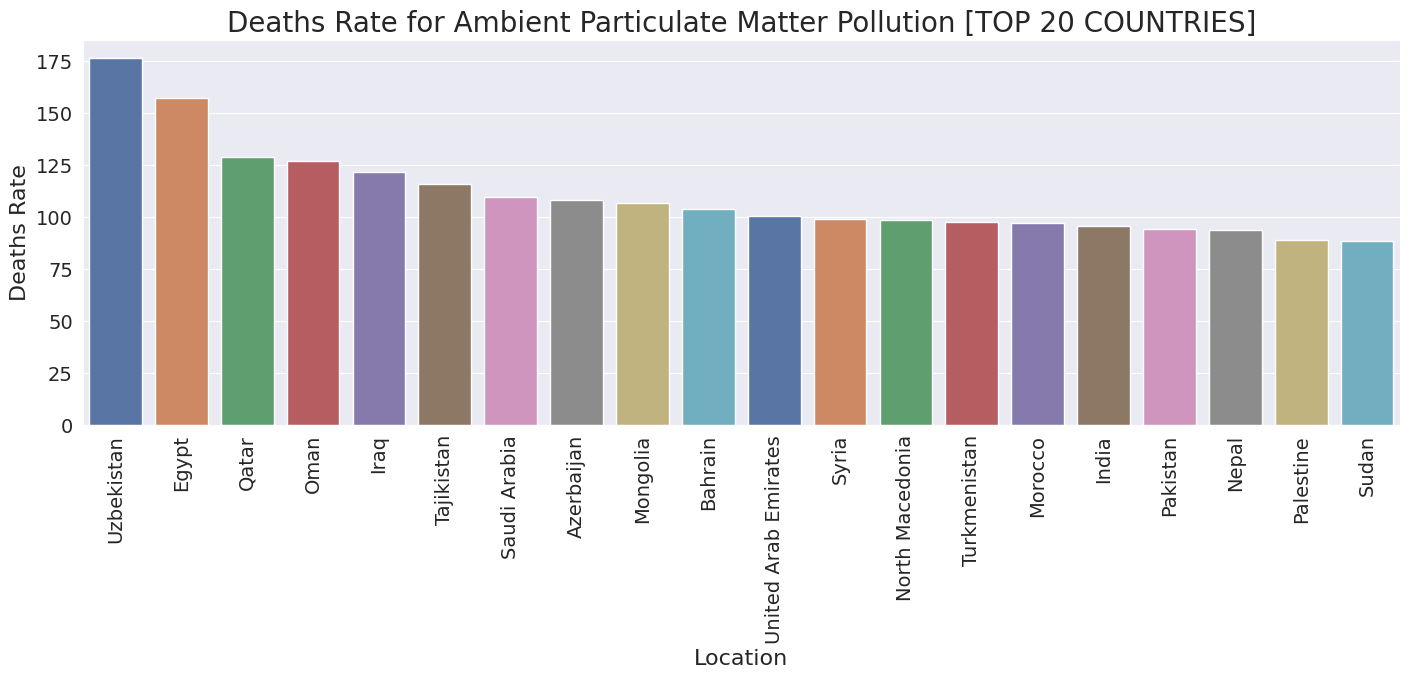

In [ ]:
sns.barplot(x='Entity', y='Deaths Rate for Ambient Particulate Matter Pollution', data=drapmp1hd, palette='deep')

plt.xlabel('Location', fontsize=16)
plt.ylabel('Deaths Rate', fontsize=16)
plt.xticks(rotation=90)
plt.title('Deaths Rate for Ambient Particulate Matter Pollution [TOP 20 COUNTRIES]', fontsize=20)

plt.show();

In [ ]:
drapmp1hd

,Entity,Year,Deaths Rate for Ambient Particulate Matter Pollution
0,Uzbekistan,2019,176.45
1,Egypt,2019,157.47
2,Qatar,2019,128.86
3,Oman,2019,127.02
4,Iraq,2019,121.62
5,Tajikistan,2019,115.85
6,Saudi Arabia,2019,109.84
7,Azerbaijan,2019,108.39
8,Mongolia,2019,106.76
9,Bahrain,2019,103.71


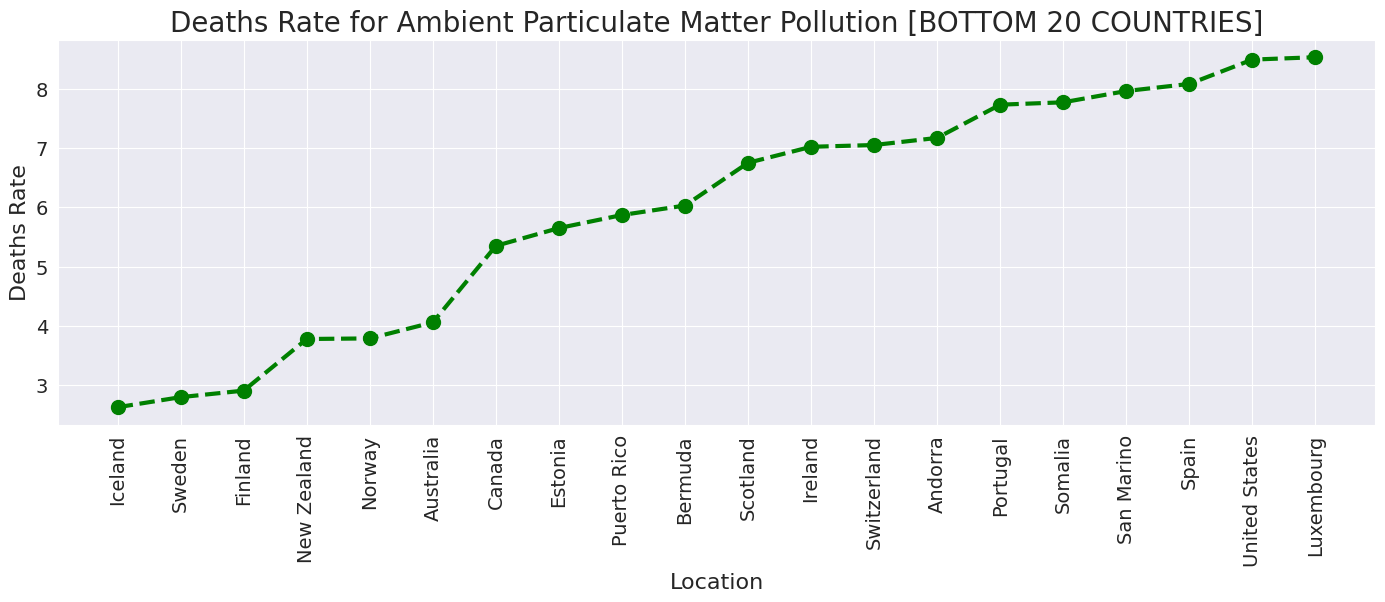

In [ ]:
plt.plot(drapmp1tl['Entity'], drapmp1tl['Deaths Rate for Ambient Particulate Matter Pollution'], 'o--g', lw=3, ms=10)

plt.xlabel('Location', fontsize=16)
plt.ylabel('Deaths Rate', fontsize=16)
plt.xticks(rotation=90)
plt.title('Deaths Rate for Ambient Particulate Matter Pollution [BOTTOM 20 COUNTRIES]', fontsize=20)

plt.show();

In [ ]:
drapmp1tl

,Entity,Year,Deaths Rate for Ambient Particulate Matter Pollution
207,Iceland,2019,2.63
206,Sweden,2019,2.80
205,Finland,2019,2.91
204,New Zealand,2019,3.78
203,Norway,2019,3.79
202,Australia,2019,4.06
201,Canada,2019,5.35
200,Estonia,2019,5.65
199,Puerto Rico,2019,5.87
198,Bermuda,2019,6.03


In [ ]:
HTML('''<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/13188083"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

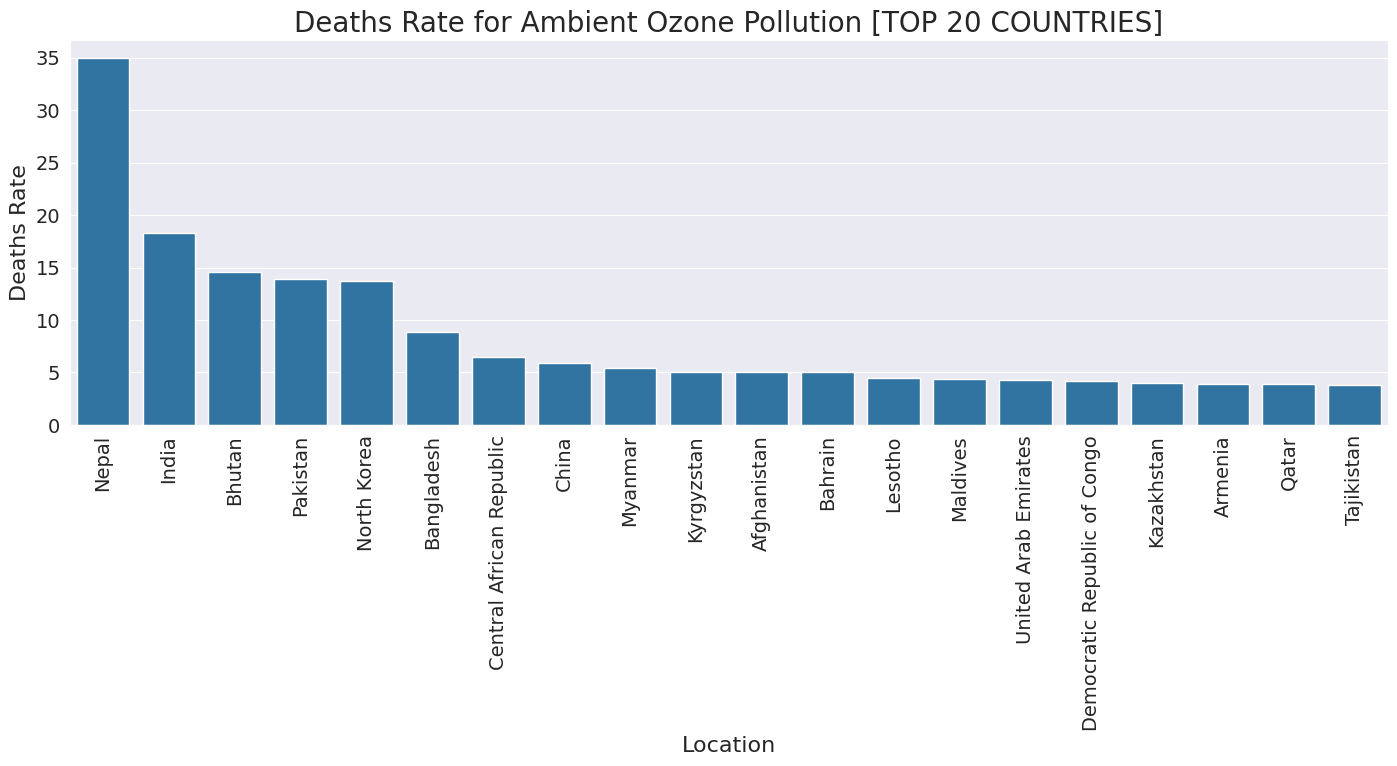

In [ ]:
sns.barplot(x='Entity', y='Deaths Rate for Ambient Ozone Pollution', data=drapmp2hd)

plt.xlabel('Location', fontsize=16)
plt.ylabel('Deaths Rate', fontsize=16)
plt.xticks(rotation=90)
plt.title('Deaths Rate for Ambient Ozone Pollution [TOP 20 COUNTRIES]', fontsize=20)

plt.show();

In [ ]:
drapmp2hd

,Entity,Year,Deaths Rate for Ambient Ozone Pollution
0,Nepal,2019,34.93
1,India,2019,18.30
2,Bhutan,2019,14.53
3,Pakistan,2019,13.93
4,North Korea,2019,13.74
5,Bangladesh,2019,8.85
6,Central African Republic,2019,6.46
7,China,2019,5.91
8,Myanmar,2019,5.42
9,Kyrgyzstan,2019,5.06


<ipython-input-38-394d985dfc35>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Entity', y='Deaths Rate for Ambient Ozone Pollution', data=drapmp2tl, palette='deep')


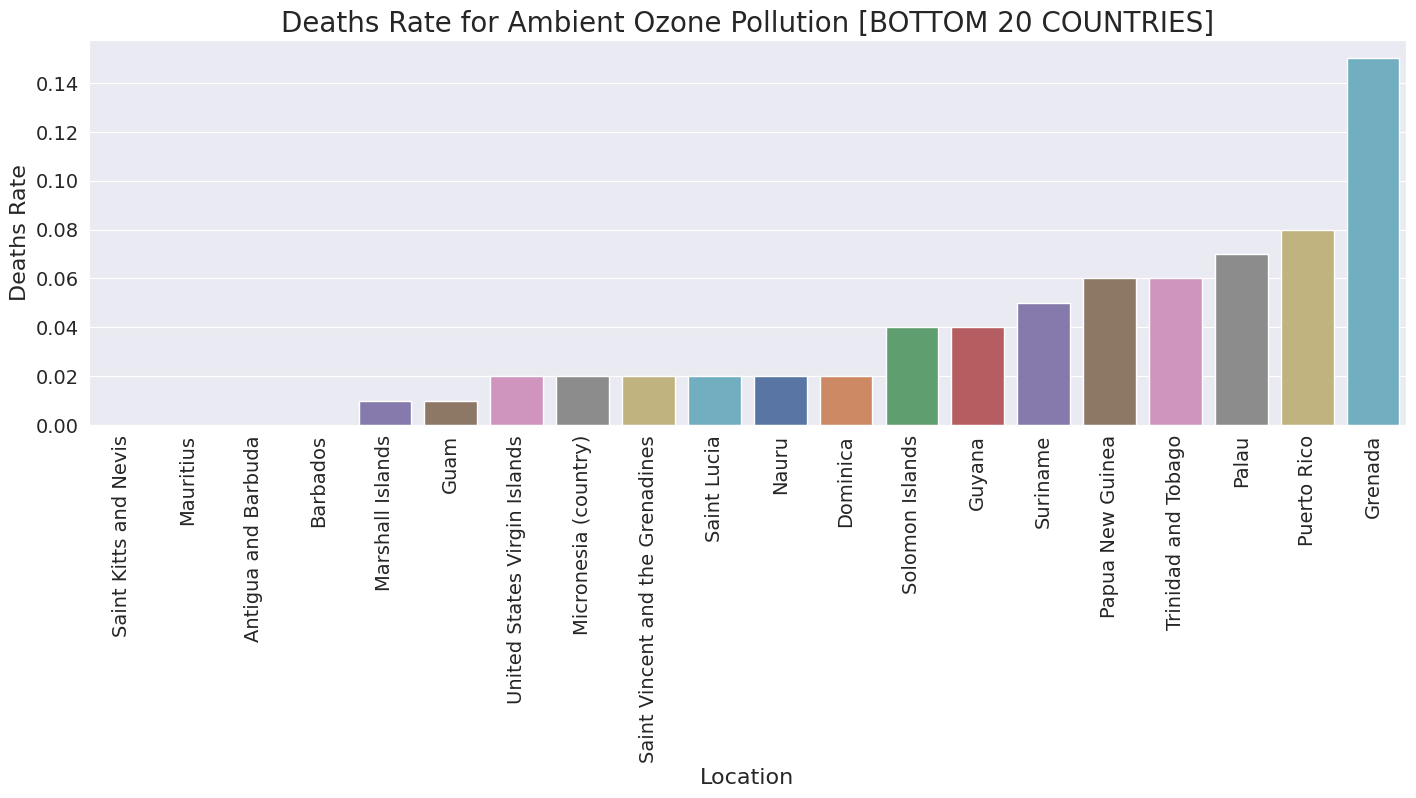

In [ ]:
sns.barplot(x='Entity', y='Deaths Rate for Ambient Ozone Pollution', data=drapmp2tl, palette='deep')

plt.xlabel('Location', fontsize=16)
plt.ylabel('Deaths Rate', fontsize=16)
plt.xticks(rotation=90)

plt.title('Deaths Rate for Ambient Ozone Pollution [BOTTOM 20 COUNTRIES]', fontsize=20)

plt.show();

In [ ]:
drapmp2tl

,Entity,Year,Deaths Rate for Ambient Ozone Pollution
207,Saint Kitts and Nevis,2019,0.00
206,Mauritius,2019,0.00
205,Antigua and Barbuda,2019,0.00
204,Barbados,2019,0.00
203,Marshall Islands,2019,0.01
202,Guam,2019,0.01
200,United States Virgin Islands,2019,0.02
201,Micronesia (country),2019,0.02
197,Saint Vincent and the Grenadines,2019,0.02
196,Saint Lucia,2019,0.02


In [ ]:
fig1 = px.pie(drapmpre, values='Deaths Rate for Ambient Particulate Matter Pollution', names='Entity', title='Deaths Rate for Ambient Particulate Matter Pollution - REGION')

fig1.show()

In [ ]:
drapmpre

,Entity,Year,Deaths Rate for Ambient Particulate Matter Pollution,Deaths Rate for Ambient Ozone Pollution
0,East Asia & Pacific (WB),2019,60.50,3.98
1,South-East Asia Region (WHO),2019,81.78,13.95
2,South Asia (WB),2019,91.21,16.91
3,Middle East & North Africa (WB),2019,92.85,2.65
4,Sub-Saharan Africa (WB),2019,42.76,2.21
5,African Region (WHO),2019,43.87,2.22
6,European Region (WHO),2019,27.17,1.23
7,Latin America & Caribbean (WB),2019,25.98,1.26
8,North America (WB),2019,8.15,1.98
9,G20,2019,51.54,5.07


In [ ]:
fig2 = px.pie(drapmpre, values='Deaths Rate for Ambient Ozone Pollution', names='Entity', title='Deaths Rate for Ambient Ozone Pollution - REGION')

fig2.show()

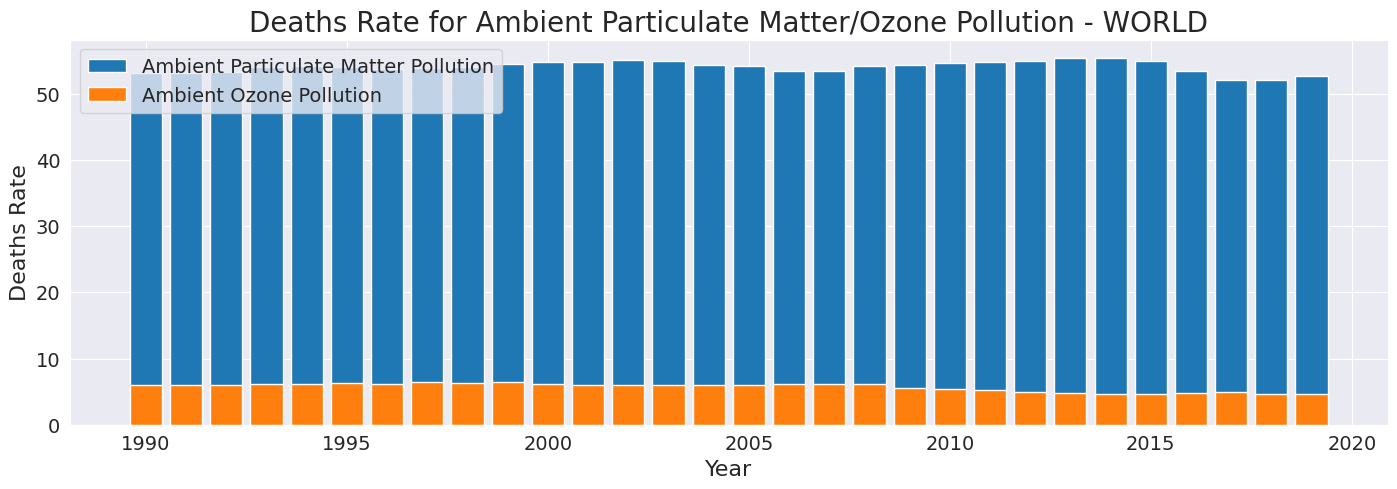

In [ ]:
plt.bar(drapmpwd["Year"], drapmpwd["Deaths Rate for Ambient Particulate Matter Pollution"])
plt.bar(drapmpwd["Year"], drapmpwd["Deaths Rate for Ambient Ozone Pollution"])

plt.xlabel('Year', fontsize=16)
plt.ylabel('Deaths Rate', fontsize=16)

plt.title('Deaths Rate for Ambient Particulate Matter/Ozone Pollution - WORLD', fontsize=20)
plt.legend(['Ambient Particulate Matter Pollution', 'Ambient Ozone Pollution'], loc='upper left')

plt.show();

In [ ]:
drapmpwd

,Entity,Year,Deaths Rate for Ambient Particulate Matter Pollution,Deaths Rate for Ambient Ozone Pollution
0,World,1990,53.15,6.00
1,World,1991,53.07,5.94
2,World,1992,53.26,6.00
3,World,1993,54.02,6.08
4,World,1994,54.23,6.19
5,World,1995,53.98,6.24
6,World,1996,53.75,6.21
7,World,1997,53.88,6.38
8,World,1998,54.01,6.28
9,World,1999,54.49,6.45


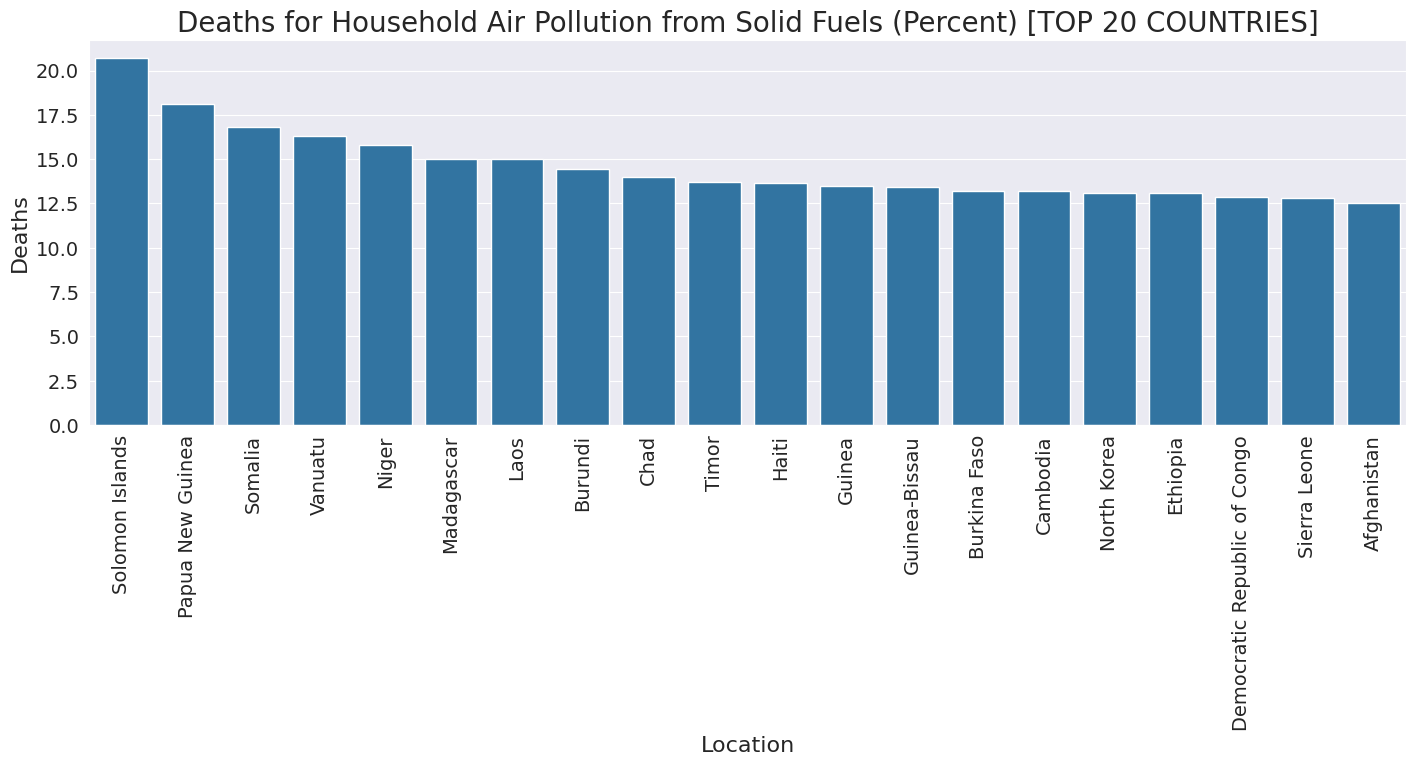

In [ ]:
sns.barplot(x='Entity', y='Deaths for Household Air Pollution from Solid Fuels (Percent)', data=dhapsfp19)

plt.xlabel('Location', fontsize=16)
plt.ylabel('Deaths', fontsize=16)
plt.xticks(rotation=90)
plt.title('Deaths for Household Air Pollution from Solid Fuels (Percent) [TOP 20 COUNTRIES]', fontsize=20)

plt.show();

In [ ]:

if 'merap' in globals():
    df_map = merap.copy()

    # Create a choropleth map
    fig = px.choropleth(df_map,
                        locations="Entity",  # Column with country names
                        locationmode="country names",
                        color="Total Deaths for Air Pollution",  # Data for coloring
                        hover_name="Entity",
                        animation_frame="Year",  # Allows visualization over time
                        title="Impact of Air Pollution on Human Health (Geographical)",
                        color_continuous_scale="Reds")

    fig.update_layout(geo=dict(showcoastlines=True, projection_type="natural earth"))
    fig.show()
else:
    print("Dataset not found. Ensure the correct dataframe is used.")


Conclusion:

  